In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au
import importlib

In [78]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [13, 14, 15]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 50000, 10000, 2*10**(10), 132000, 10000, 5.0*10**(-9)])
    fitted = au.triple_Linewidth2(PSD[0], *fit)
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    lb = int(125000*nps_frac)
    ub = int(200000*nps_frac)
    fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 132000, 20000, 3*10**(-10)])
    fitted = au.Linewidth2(PSDx[0], *fit)
    
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

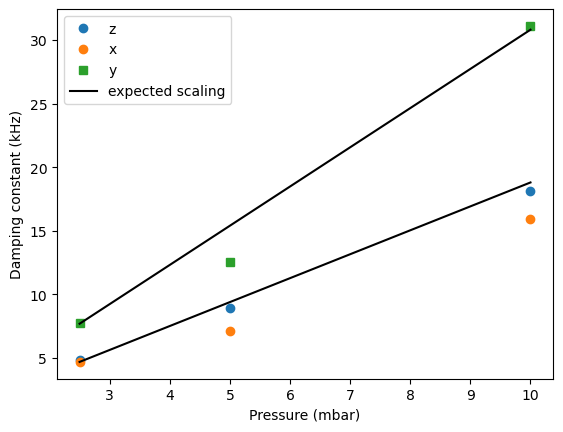

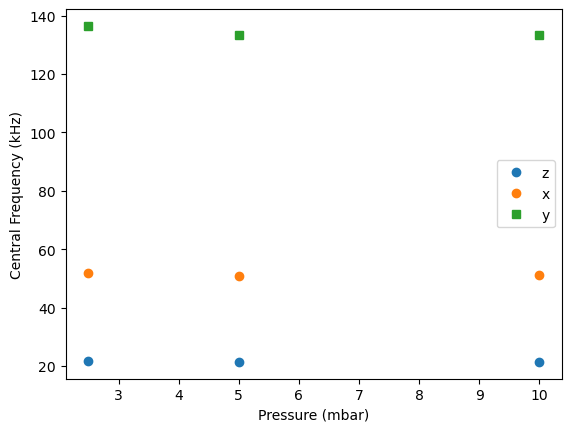

In [93]:
pressure = [10, 5, 2.5]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.plot([2.5, 10], [4.7, 4.7*10/2.5], 'k')
plt.plot([2.5, 10], [7.7, 7.7*10/2.5], 'k', label = 'expected scaling')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

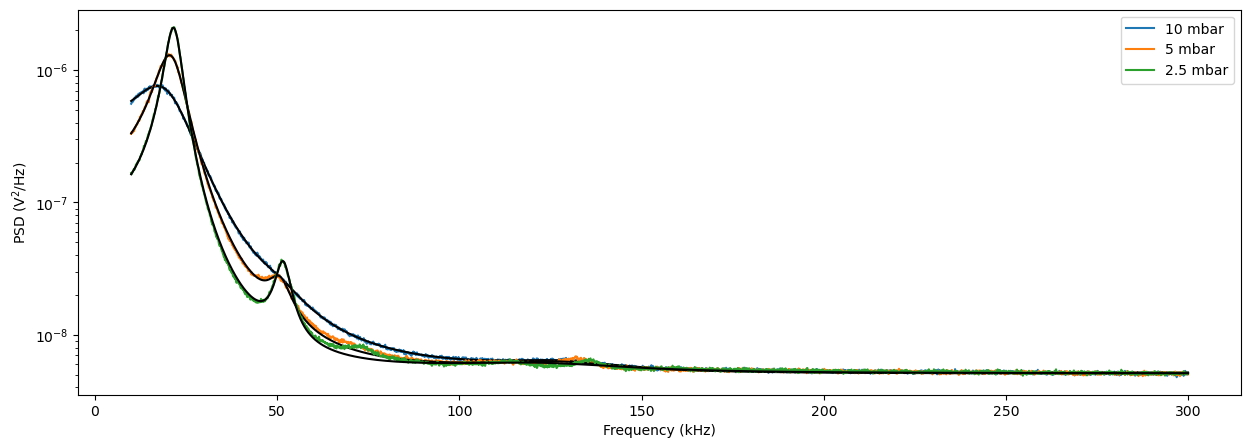

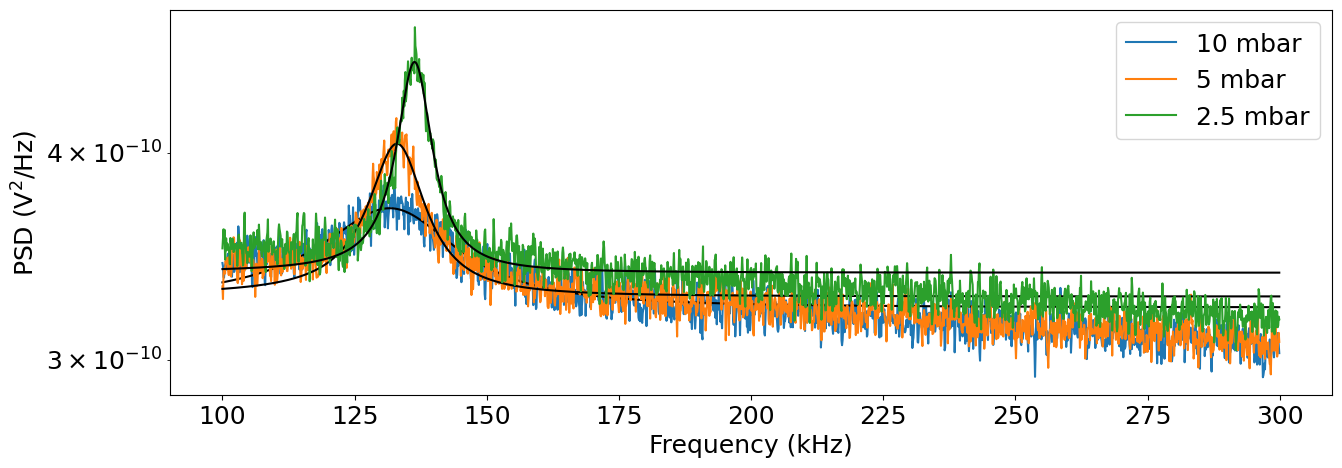

In [84]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

In [65]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [10, 12]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(400000*nps_frac)
    fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [1*10**12, 30000, 30000,  4*10*10**(11), 65000, 40000, 2*10**(12), 240000, 40000, 5.0*10**(-9)])
    fitted = au.triple_Linewidth2(PSD[0], *fit)
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    # lb = int(125000*nps_frac)
    # ub = int(200000*nps_frac)
    # fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 132000, 20000, 3*10**(-10)])
    # fitted = au.Linewidth2(PSDx[0], *fit)
    
    # fit_l2.append(fit)
    # fitted_l2.append(fitted)
PSD_freq = PSD[0]

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.

In [63]:
file

10

IndexError: index 2 is out of bounds for axis 0 with size 0

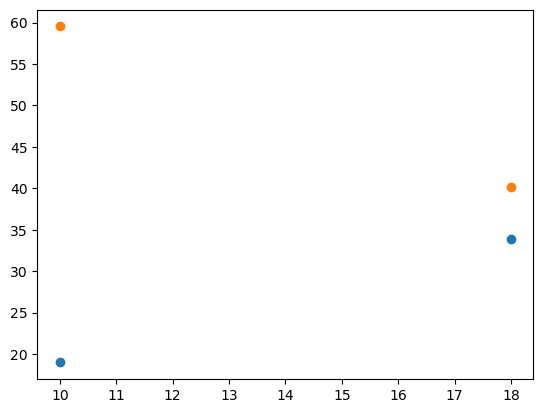

In [25]:
pressure = [18, 10]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

In [68]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(400000*nps_frac)
fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD_freq[lb:ub], PSDs[1][lb:ub], p0 = [1*10**12, 30000, 30000,  4*10*10**(11), 65000, 40000, 2*10**(12), 240000, 40000, 5.0*10**(-9)])
fitted1 = au.triple_Linewidth2(PSD_freq, *fit)# 1*10**12, 30000, 30000,  4*10*10**(11), 65000, 40000, 2*10**(12), 240000, 40000, 5.0*10**(-9))
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    #plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.plot(PSD_freq[lb:ub]/1000, fitted1[lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

# plt.figure(figsize = (15, 5))
# plt.tick_params(axis='both', which='both', labelsize=18)
# lb = int(100000*nps_frac)
# ub = int(300000*nps_frac)
# for n, PSD in enumerate(PSDs2):
#     plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
#     plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
# plt.yscale('log')
# plt.legend(fontsize = 18)
# plt.xlabel('Frequency (kHz)', fontsize = 18)
# plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.

<Figure size 1500x500 with 0 Axes>

In [75]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [4, 5, 6, 7]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.double_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000, 10**11, 160000, 10000, 5*10**(-9)])
    fitted = au.double_Linewidth2(PSD[0], *fit)
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    lb = int(200000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [10*10**8, 220000, 20000, 3*10**(-10)])
    fitted = au.Linewidth2(PSDx[0], *fit)
    
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

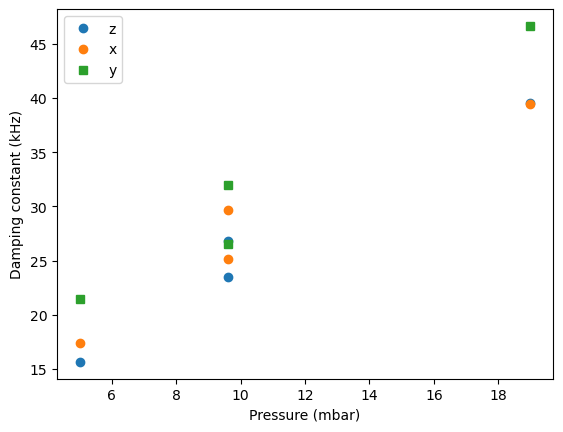

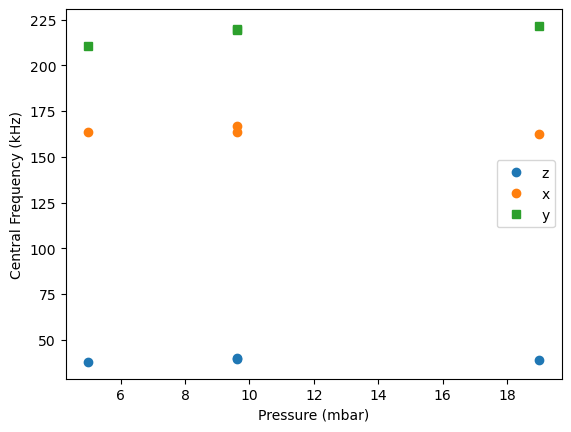

In [76]:
pressure = [19, 9.6, 9.6, 5]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

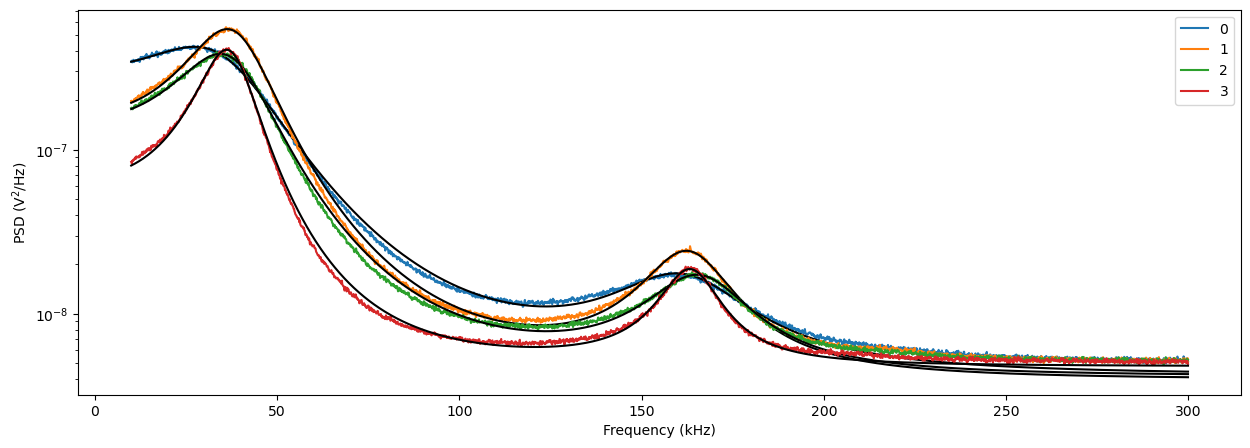

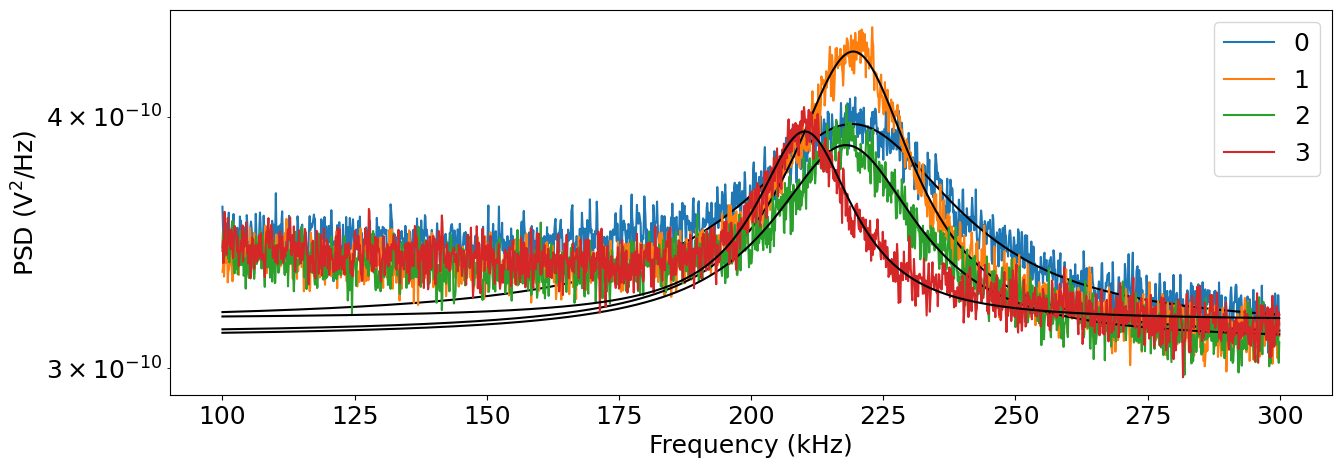

In [77]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(n))
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)

In [94]:
importlib.reload(au)

filename = 'D:/Lab Data/diamond/240520/'
files = [22, 23, 24, 25]
PSDs = []
fit_l = []
fitted_l = []

PSDs2 = []
fit_l2 = []
fitted_l2 = []
for file in files: 
    data = sio.loadmat(filename + str(file) + '.mat')
    tt = np.transpose(data['D'])[0]
    fs = int(1/data['Tinterval'][0][0])
    nps_frac = 0.01
    PSD = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs.append(PSD[1])
    
    
    lb = int(10000*nps_frac)
    ub = int(300000*nps_frac)
    fit, cov = opt.curve_fit(au.triple_Linewidth2, PSD[0][lb:ub], PSD[1][lb:ub], p0 = [10**11, 25000, 10000,  10*10**(10), 120000, 10000, 2*10**(10), 150000, 10000, 7.0*10**(-9)])
    fitted = au.triple_Linewidth2(PSD_freq, *fit)
    
    fit_l.append(fit)
    fitted_l.append(fitted)

    tt = np.transpose(data['A'])[0]
    PSDx = scisig.welch(tt, fs = fs, nperseg = int(nps_frac*fs))
    PSDs2.append(PSDx[1])
    
    lb = int(100000*nps_frac)
    ub = int(200000*nps_frac)
    fit, cov = opt.curve_fit(au.Linewidth2, PSDx[0][lb:ub], PSDx[1][lb:ub], p0 = [3*10**8, 152000, 20000, 3*10**(-10)])
    fitted = au.Linewidth2(PSDx[0], *fit)
   
    fit_l2.append(fit)
    fitted_l2.append(fitted)
PSD_freq = PSD[0]

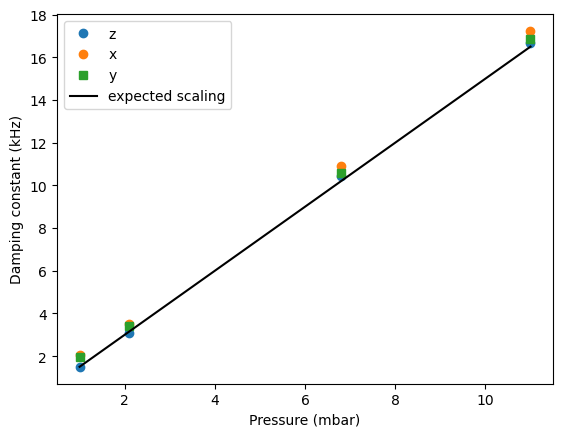

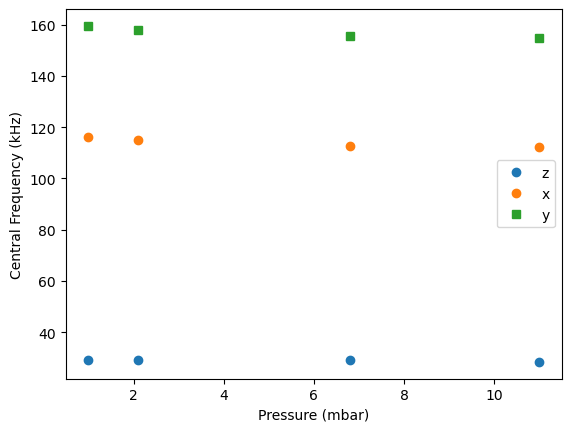

In [99]:
pressure = [1, 2.1, 6.8, 11]
plt.plot(pressure, np.transpose(fit_l)[2]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[5])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[8][3], abs(np.transpose(fit_l)[8][5])])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, abs(np.transpose(fit_l2)[2])/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.plot([1, 11], [1.5, 1.5*11], 'k', label = 'expected scaling')
plt.ylabel('Damping constant (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()
plt.figure()
plt.plot(pressure, np.transpose(fit_l)[1]/1000, 'o', label = 'z')
plt.plot(pressure, abs(np.transpose(fit_l)[4])/1000, 'o', label = 'x')
#plt.plot([3, 5], np.array([np.transpose(fit_l)[7][3], np.transpose(fit_l)[7][5]])/1000, 'o', label = 'y - fit 1')
plt.plot(pressure, np.transpose(fit_l2)[1]/1000, 'tab:green', marker = 's', linestyle = "none", label = 'y')
plt.ylabel('Central Frequency (kHz)')
plt.xlabel('Pressure (mbar)')
plt.legend()

Text(0, 0.5, 'PSD (V$^2$/Hz)')

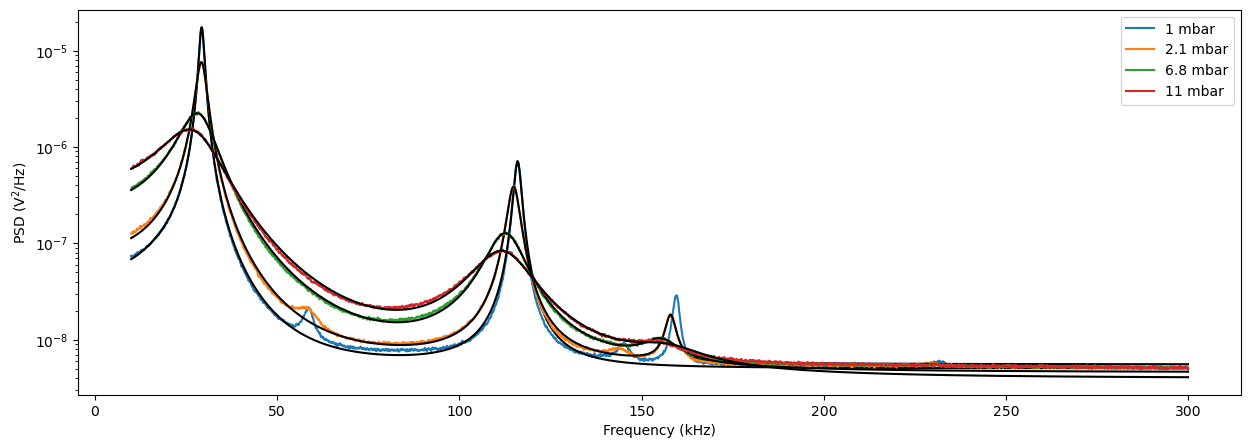

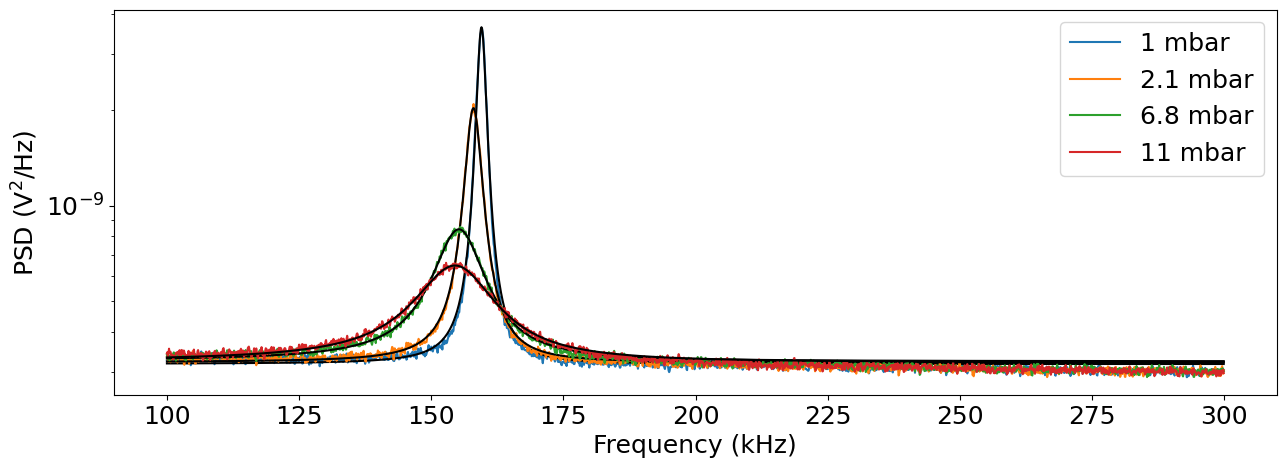

In [101]:
plt.figure(figsize = (15, 5))
lb = int(10000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l[n][lb:ub], 'k')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD (V$^2$/Hz)')

plt.figure(figsize = (15, 5))
plt.tick_params(axis='both', which='both', labelsize=18)
lb = int(100000*nps_frac)
ub = int(300000*nps_frac)
for n, PSD in enumerate(PSDs2):
    plt.plot(PSD_freq[lb:ub]/1000, PSD[lb:ub], label = str(pressure[n])+' mbar')
    plt.plot(PSD_freq[lb:ub]/1000, fitted_l2[n][lb:ub], 'k')
plt.yscale('log')
plt.legend(fontsize = 18)
plt.xlabel('Frequency (kHz)', fontsize = 18)
plt.ylabel('PSD (V$^2$/Hz)', fontsize = 18)